In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
    '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
    '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
    'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore',
    'CoastalVulnerability', '_sort_4', '_sort_1', 'AgriculturalPractices', '_25th', '_sort_0',
    '_sort_11', 'MonsoonIntensity', '_cnt7', '_sort_16', '_sort_13', '_sort_8',
]
train = train.drop(columns=feats_to_drop)

In [5]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

del train

In [6]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)

# Training

In [7]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240519_090003"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240519_090003/ds_sub_fit/sub_fit_ho.
2024-05-19 09:00:04,792	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 21. Best iteration is:
	[20]	valid_set's l2: 0.000709682	valid_set's r2: -80.7693
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 16. Best iteration is:
	[16]	valid_set's l2: 0.000619172	valid_set's r2: -80.7265
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[15]	valid_set's l2: 0.000662168	valid_set's r2: -81.6543
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[17]	valid_set's l2: 0.000600451	valid_set's r2: -81.2042
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[17]	valid_set's l2: 0.00059

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[12]	valid_set's l2: 0.00101341	valid_set's r2: -80.6525
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[11]	valid_set's l2: 0.00107526	valid_set's r2: -81.5829
	Ran out of time, early stopping on iteration 18. Best iteration is:
	[11]	valid_set's l2: 0.00107958	valid_set's r2: -81.0527
	Ran out of time, early stopping on iteration 18. Best iteration is:
	[11]	valid_set's l2: 0.00108189	valid_set's r2: -80.7847
	Ran out of time, early stopping on iteration 19. Best iteration is:
	[11]	valid_set's l2: 0.00107831	valid_set's r2: -81.2557
	Ran out of time, early stopping on iteration 20. Best iteration is:
	[11]	valid_set's l2: 0.00107929	valid_set's r2: -81.1828
	Ran out of time, early stopping on iteration 22. Best iteration is:
	[11]	valid_set's l2: 0.00106916	valid_set's r2: -82.0156
	Ran out of time, early

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 23.
	Ran out of time, early stopping on iteration 27.
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 30.
	Ran out of time, early stopping on iteration 32.
	Ran out of time, early stopping on iteration 35.
	Ran out of time, early stopping on iteration 44.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8136	 = Validation score   (r2)
	76.02s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 84.3s of the 8714.37s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.3353	 = Validation score   (r2)
	78.77s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 84.3s of the 8619.75s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[12]	valid_set's l2: 0.00143976	valid_set's r2: -80.9172
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[15]	valid_set's l2: 0.00124519	valid_set's r2: -81.8122
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[17]	valid_set's l2: 0.00114607	valid_set's r2: -81.2436
	Ran out of time, early stopping on iteration 18. Best iteration is:
	[18]	valid_set's l2: 0.00110174	valid_set's r2: -80.876
	Ran out of time, early stopping on iterati

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239459	valid_set's r2: -92.7265
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00231005	valid_set's r2: -88.8331
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239437	valid_set's r2: -91.5968
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258216	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238857	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0023033	valid_set's r2: -89.3979
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238879	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258146	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterati

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 19.
	Ran out of time, early stopping on iteration 23.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.2491	 = Validation score   (r2)
	59.75s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 67.96s of the 4354.46s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autog

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 67.96s of the 4250.85s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00247534	valid_set's r2: -94.0109
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 67.96s of the 4238.2s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 102. Best iteration is:
	[97]	valid_set's l2: 0.000355205	valid_set's r2: -81.2849
	Ran out of time, early stopping on iteration 107. Best iteration is:
	[101]	valid_set's l2: 0.000358053	valid_set's r2: -81.0226
	Ran out of time, early stopping on iteration 110. Best iteration is:
	[110]	valid_set's l2: 0.000358771	valid_set's r2: -81.7889
	Ran out of time, early stopping on iteration 113. Best iteration is:
	[112]	valid_set's l2: 0.000352374	valid_set's r2: -81.626
	Ran out of time, early stopping on iteration 118. Best iteration is:
	[118]	valid_set's l2: 0.000355747	valid_set's r2: -80.9652
	Ran out of time, early stopping on iteration 126. Best iteration is:
	[122]	valid_set's l2: 0.000352522	valid_set's r2: -81.4548
	Ran out of time, early stopping on iteration 136. Best iteration is:
	[136]	valid_set's l2: 0.000355561	valid_set's r2: -81.0088
	Ran

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	116.93s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	0.5963	 = Validation score   (r2)
	121.56s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 266.41s of the 27918.38s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/c

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 95.
	Ran out of time, early stopping on iteration 99.
	Ran out of time, early stopping on iteration 103.
	Ran out of time, early stopping on iteration 108.
	Ran out of time, early stopping on iteration 114.
	Ran out of time, early stopping on iteration 122.
	Ran out of time, early stopping on iteration 135.
	Ran out of time, early stopping on iteration 167.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8664	 = Validation score   (r2)
	250.28s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 266.41s of the 27628.11s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8674	 = Validation score   (r2)

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8598	 = Validation score   (r2)
	253.11s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 266.41s of the 27103.3s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6156	 = Validation score   (r2)
	171.17s	 = Training   runtime
	1.67s	 = Validation runtime
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tuning model for up to 266.41s of the 26929.01s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 186.
	Ran out of time, early stopping on iteration 195.

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 28. Best iteration is:
	[26]	valid_set's l2: 0.000512293	valid_set's r2: -81.0577
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 23. Best iteration is:
	[23]	valid_set's l2: 0.000432968	valid_set's r2: -81.0574
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[17]	valid_set's l2: 0.000756794	valid_set's r2: -81.0713
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.00232635	valid_set's r2: -89.2867
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 18. Best iteration is:
	[13]	valid_set's l2: 0.000940619	valid_set's r2: -81.0575
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.000801657	valid_set's r2: -81.0574
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.00144981	valid_set's r2: -81.3163
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6. Best iteration is:
	[6]	valid_set's l2: 0.00244755	valid_set's r2: -93.3438
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 31.
	Ran out of time, early stopping on iteration 32.
	Ran out of time, early stopping on iteration 33.
	Ran out of time, early stopping on iteration 35.
	Ran out of time, early stopping on iteration 35.
	Ran out of time, early stopping on iteration 37.
	Ran out of time, early stopping on iteration 42.
	Ran out of time, early stopping on iteration 48.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8391	 = Validation score   (r2)
	206.61s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 218.74s of the 14223.28s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packa

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 218.74s of the 13958.79s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 16. Best iter

In [8]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

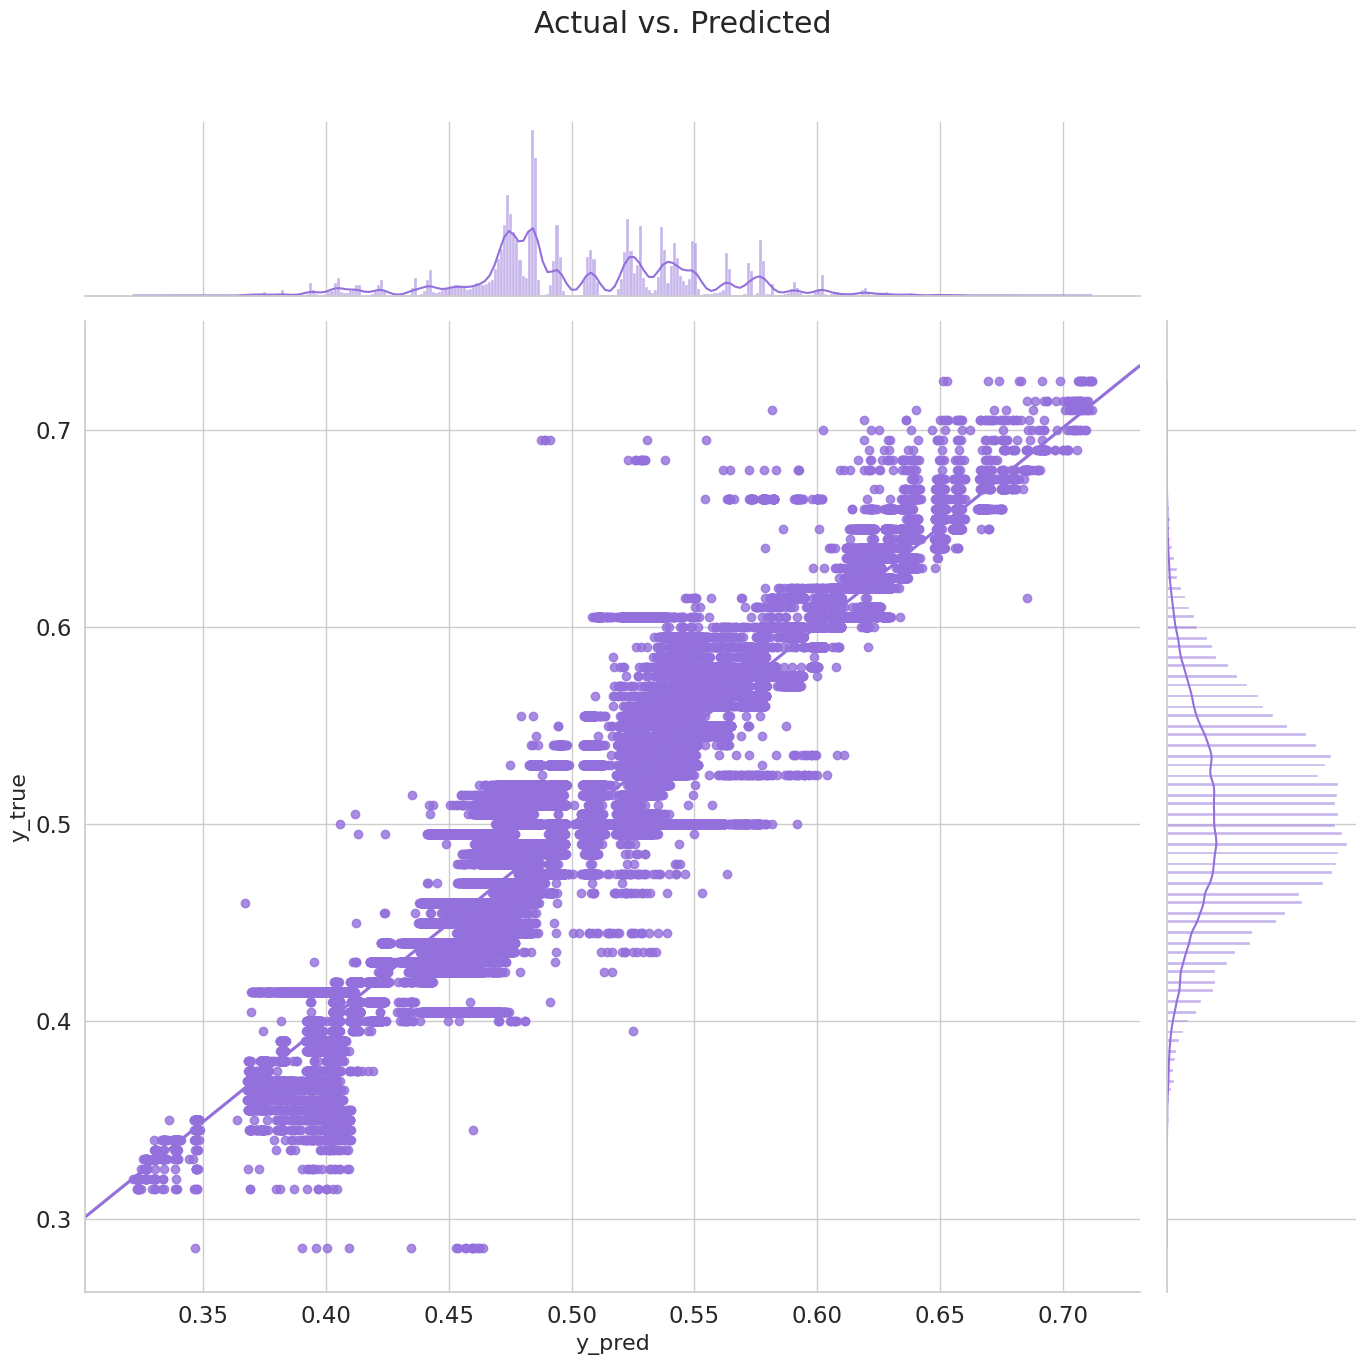

In [9]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [10]:
score = predictor.evaluate(_val, silent=True)['r2']

In [11]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8693893330320892


In [12]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_19', '_50th', '_cnt19', '_cnt22']


In [13]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.869389,0.869229,r2,106.467856,1.963364,12916.265035,0.008753,0.027900,7.548982,3,True,57
1,XGBoost_r194_BAG_L1,0.869271,0.869097,r2,0.964931,0.004579,221.034527,0.964931,0.004579,221.034527,1,True,20
2,CatBoost_r6_BAG_L2,0.869174,0.868910,r2,105.241629,1.924008,12489.039399,0.830972,0.004399,209.205135,2,True,55
3,CatBoost_r163_BAG_L2,0.869046,0.868677,r2,104.776083,1.925096,12488.847446,0.365426,0.005487,209.013181,2,True,56
4,ExtraTrees_r4_BAG_L1,0.868695,0.868057,r2,1.397191,0.003299,263.396173,1.397191,0.003299,263.396173,1,True,34
5,CatBoost_r180_BAG_L1,0.868654,0.868623,r2,1.058281,0.005409,251.601453,1.058281,0.005409,251.601453,1,True,46
6,ExtraTrees_r172_BAG_L1,0.868484,0.867786,r2,0.904294,0.003177,278.869594,0.904294,0.003177,278.869594,1,True,21
7,CatBoost_r167_BAG_L1,0.868478,0.868450,r2,0.300294,0.004681,251.532754,0.300294,0.004681,251.532754,1,True,26
8,XGBoost_r194_BAG_L2,0.868426,0.867860,r2,105.262705,1.925577,12490.497736,0.852048,0.005969,210.663472,2,True,54
9,ExtraTreesMSE_BAG_L1,0.868421,0.867448,r2,0.796207,0.003345,267.842626,0.796207,0.003345,267.842626,1,True,5


In [14]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,0.665383,0.006161,0.000000,5,0.678067,0.652698
_sum_log,0.068071,0.000807,0.000000,5,0.069732,0.066410
_mean,0.022079,0.000501,0.000000,5,0.023111,0.021047
_entropy,0.003184,0.000373,0.000022,5,0.003953,0.002416
_special1,0.001185,0.000188,0.000074,5,0.001573,0.000797
_max,0.000926,0.000237,0.000471,5,0.001413,0.000439
_2nd_moment,0.000450,0.000119,0.000537,5,0.000695,0.000205
_cnt15,0.000408,0.000189,0.004243,5,0.000796,0.000019
_skew,0.000241,0.000158,0.013563,5,0.000566,-0.000085
_3rd_moment,0.000234,0.000141,0.010151,5,0.000524,-0.000055


# Making Predictions and Creating a Submission File

In [15]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [16]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.578226
1117958,1117958,0.456680
1117959,1117959,0.446683
1117960,1117960,0.466895
1117961,1117961,0.466799


In [17]:
shutil.rmtree("AutogluonModels")